# Business Understanding

## Project Domain

Project Domain ini berada pada bidang Kesehatan (Healthcare Technology), khususnya di area Preventive Medicine dan Medical Decision Support System (MDSS). Tujuan utama dari domain ini adalah memanfaatkan data rekam medis pasien untuk memprediksi risiko penyakit secara dini, dalam hal ini adalah penyakit jantung.

## Problem Statements

Penyakit jantung adalah penyebab utama kematian di seluruh dunia.

Deteksi dini dapat meningkatkan hasil pengobatan secara signifikan.

Analisis manual faktor risiko memakan waktu dan rentan terhadap kesalahan manusia.

## Goals

Mengembangkan model prediksi yang akurat untuk risiko penyakit jantung.

Mengidentifikasi faktor risiko utama yang berkontribusi terhadap penyakit jantung.

Membuat alat yang dapat membantu tenaga medis dalam deteksi dini.

## Solution Statements

Menerapkan model Artificial Neural Network (ANN) untuk memprediksi penyakit jantung.

Menggunakan analisis pentingnya fitur untuk mengidentifikasi faktor risiko utama.

Mengembangkan antarmuka yang mudah digunakan untuk penilaian risiko.

# Data Understanding

## Import data dari kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"deliafebrianti","key":"ac42c6117d087e073a492342c784876c"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d mdimran6666/heart-disease-nowadays

Dataset URL: https://www.kaggle.com/datasets/mdimran6666/heart-disease-nowadays
License(s): unknown
  0% 0.00/3.02M [00:00<?, ?B/s]
100% 3.02M/3.02M [00:00<00:00, 624MB/s]


In [4]:
!mkdir heart-disease-nowadays
!unzip heart-disease-nowadays.zip -d heart-disease-nowadays
!ls heart-disease-nowadays

Archive:  heart-disease-nowadays.zip
  inflating: heart-disease-nowadays/Heart Disease.csv  
'Heart Disease.csv'


## Import Library & Load Dataset

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import pickle

In [9]:
df = pd.read_csv('heart-disease-nowadays/Heart Disease.csv')

In [10]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

## Exploratory Data Analysis

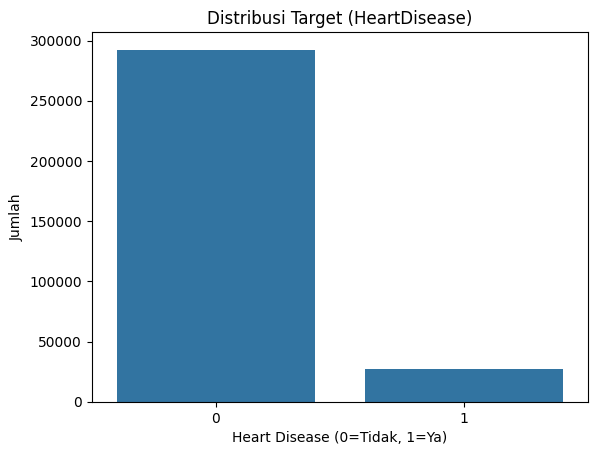

In [41]:
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribusi Target (HeartDisease)')
plt.xlabel('Heart Disease (0=Tidak, 1=Ya)')
plt.ylabel('Jumlah')
plt.show()

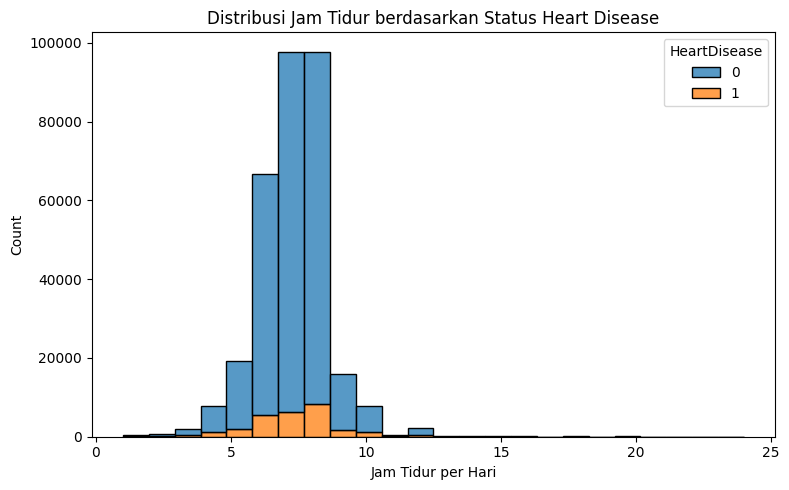

In [36]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="SleepTime", hue="HeartDisease", multiple="stack", bins=24)
plt.title("Distribusi Jam Tidur berdasarkan Status Heart Disease")
plt.xlabel("Jam Tidur per Hari")
plt.tight_layout()
plt.show()


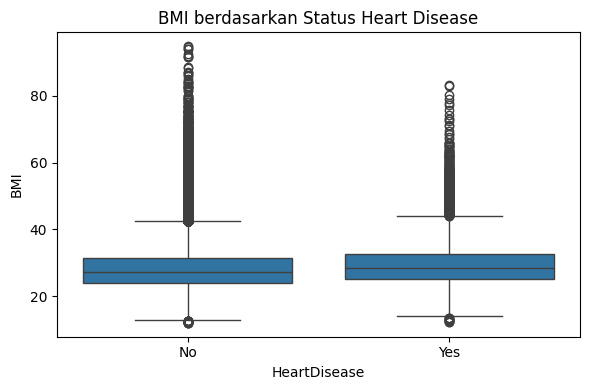

In [37]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="HeartDisease", y="BMI")
plt.title("BMI berdasarkan Status Heart Disease")
plt.xticks([0, 1], ["No", "Yes"])
plt.tight_layout()
plt.show()



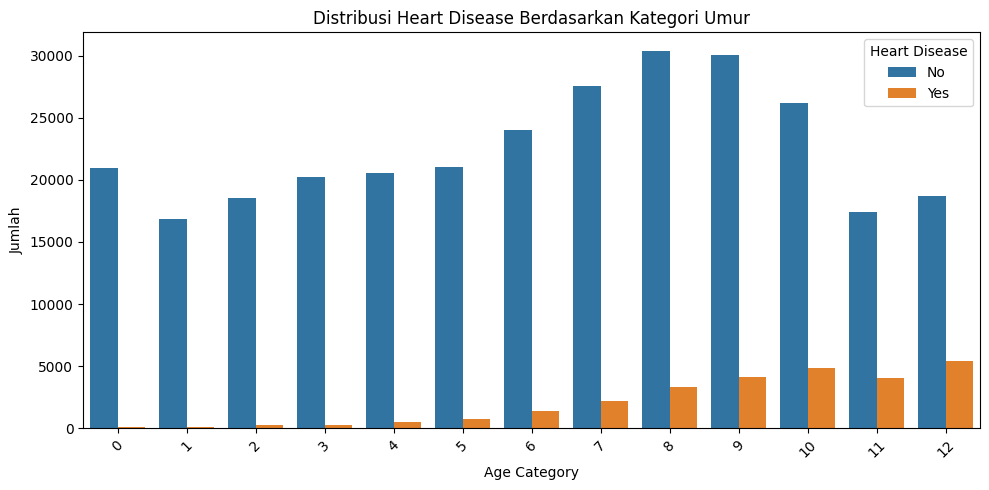

In [38]:
plt.figure(figsize=(10, 5))
order = df["AgeCategory"].value_counts().sort_index().index
sns.countplot(data=df, x="AgeCategory", hue="HeartDisease", order=order)
plt.title("Distribusi Heart Disease Berdasarkan Kategori Umur")
plt.xticks(rotation=45)
plt.xlabel("Age Category")
plt.ylabel("Jumlah")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

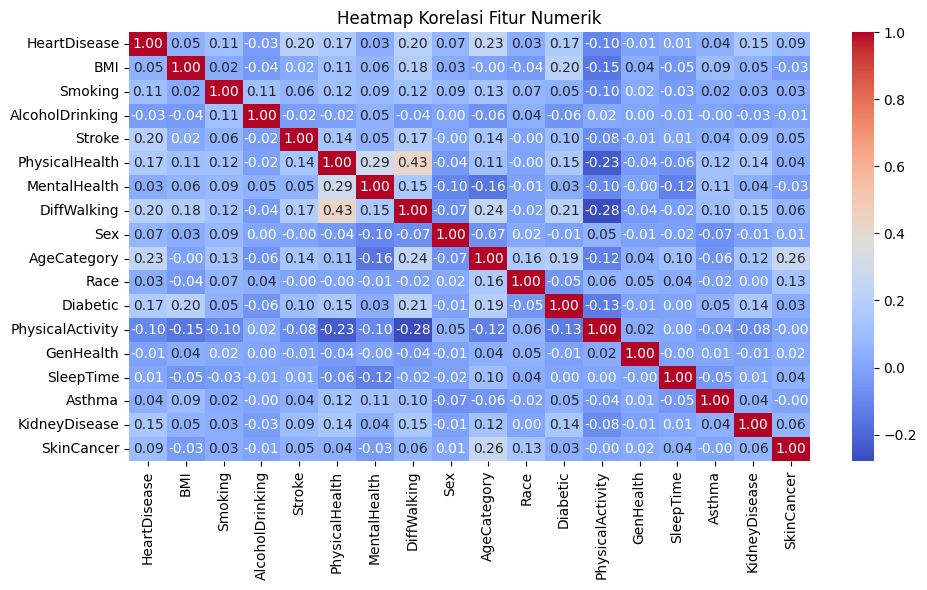

In [39]:
plt.figure(figsize=(10, 6))
numerik = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numerik.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Fitur Numerik")
plt.tight_layout()
plt.show()

# Data Preparation

In [13]:
print(df.dtypes)

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth        int64
MentalHealth          int64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime             int64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object


In [14]:
# Encode kolom kategorikal
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

In [19]:
print(df.columns)

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


In [15]:
# Pisahkan fitur dan target
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [16]:
# Scaling fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# Split Data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [20]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0


# Modeling

In [21]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [25]:
# Training model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=16,
                    verbose=1)

Epoch 1/50
15990/15990 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - accuracy: 0.9161 - loss: 0.2241 - val_accuracy: 0.9161 - val_loss: 0.2276
Epoch 2/50
15990/15990 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - accuracy: 0.9157 - loss: 0.2250 - val_accuracy: 0.9163 - val_loss: 0.2280
Epoch 3/50
15990/15990 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - accuracy: 0.9156 - loss: 0.2251 - val_accuracy: 0.9161 - val_loss: 0.2279
Epoch 4/50
15990/15990 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - accuracy: 0.9168 - loss: 0.2239 - val_accuracy: 0.9163 - val_loss: 0.2280
Epoch 5/50
15990/15990 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - accuracy: 0.9163 - loss: 0.2240 - val_accuracy: 0.9159 - val_loss: 0.2276
Epoch 6/50
15990/15990 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - accuracy: 0.9155 - loss: 0.2254 - val_accuracy: 0.9163 - val_loss: 0.2277
Epoch 7/50
15990/15990 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - accuracy: 0.9158 - loss: 0.2250 - val_accuracy: 0.9158 - val_loss: 0.2277
Epoch 8/50
15990/15990 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - accuracy: 

# Evaluation

In [26]:
# Evaluasi akurasi pada data test
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Akurasi Model: {accuracy*100:.2f}%")

Akurasi Model: 91.58%


In [27]:
# Confusion Matrix & Classification Report
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

1999/1999 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


In [28]:
print("Classification Report:\n", classification_report(y_test, y_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     58484
           1       0.61      0.04      0.08      5475

    accuracy                           0.92     63959
   macro avg       0.77      0.52      0.52     63959
weighted avg       0.89      0.92      0.88     63959

Confusion Matrix:
 [[58333   151]
 [ 5235   240]]


# Deployment

## Model Simulation

In [29]:
print(X.columns.tolist())

['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']


In [30]:
new_data = np.array([[28.0, 1, 0, 0, 3.0, 2.0, 0, 1, 4, 3, 0, 1, 2, 7.0, 0, 0, 0]])

In [31]:
# Scaling (pakai scaler hasil training)
new_data_scaled = scaler.transform(new_data)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [32]:
# Prediksi
prediction = model.predict(new_data_scaled)
prediction_class = (prediction > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


In [33]:
print(f'Hasil Prediksi (0=tidak sakit, 1=sakit): {prediction_class[0][0]}')

Hasil Prediksi (0=tidak sakit, 1=sakit): 0


## Save Model

In [34]:
model.save('./heart_disease.h5')

In [35]:
model = tf.keras.models.load_model('./heart_disease.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("./heart_disease.tflite", "wb").write(tflite_model)

Saved artifact at '/tmp/tmp30hmt2t1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 17), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  137081343618576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137081343618384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137081343622800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137081343620304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137081343622416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137081343617808: TensorSpec(shape=(), dtype=tf.resource, name=None)


3796